In [44]:
!pip install yfinance

In [45]:
import yfinance as yf


# Extracting Tesla Data 

In [46]:
tesla= yf.Ticker("TSLA")
tesladata=tesla.history(period="max")
tesladata.reset_index(inplace=True)
tesladata.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Extracting Gamestop data

In [47]:
gamestop= yf.Ticker("GME")
gamestop_data= gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


# Extracting tesla revenue

In [51]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                tesla_revenue = tesla_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index=True)

print(tesla_revenue)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

Empty DataFrame
Columns: [Date, Revenue]
Index: []


,Date,Revenue


# Extracting gamestop revenue

In [52]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
GME_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if 'GME Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                GME_revenue = GME_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index=True)

# Clean up the 'Revenue' column
GME_revenue["Revenue"] = GME_revenue['Revenue'].str.replace(',|\$', '')
GME_revenue.dropna(inplace=True)
GME_revenue = GME_revenue[GME_revenue['Revenue'] != ""]
print(GME_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


#  Stock and Revenue Dashboard

In [41]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.show()

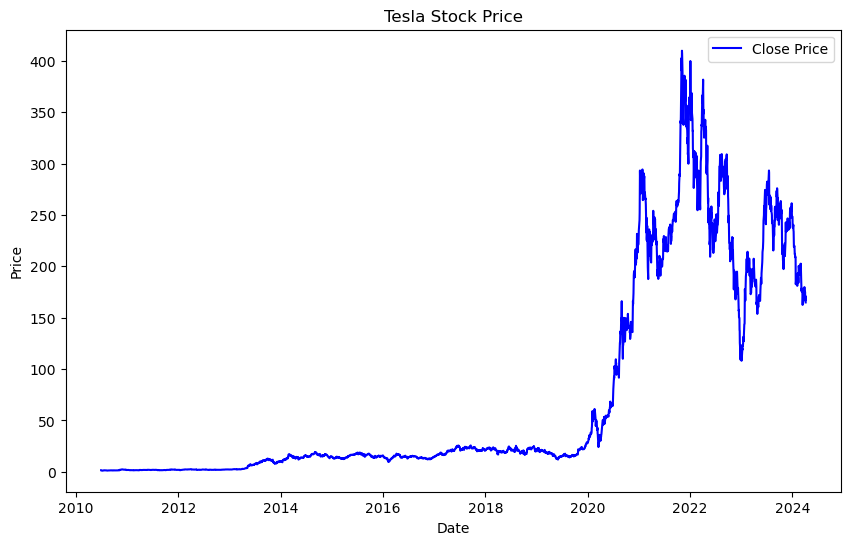

In [42]:
make_graph(tesladata, 'Tesla Stock Price')

# GME Stock and Revenue Dashboard

In [36]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.show()


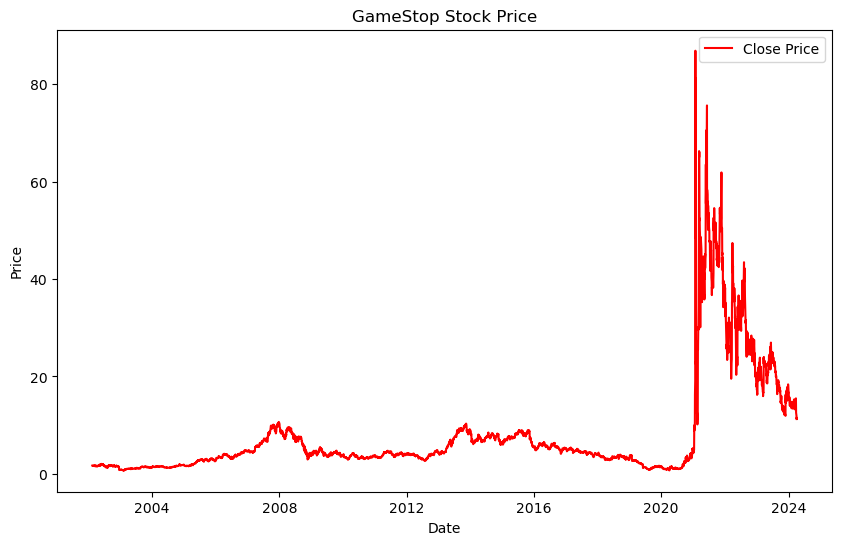

In [38]:
   make_graph(gamestop_data, 'GameStop Stock Price')